In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

#Loading Dataset

In [44]:
data=pd.read_csv('/content/retail_store_inventory.csv')

In [45]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [46]:
data.shape

(73100, 15)

In [47]:
data.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [48]:
le=LabelEncoder()
data['Store ID']=le.fit_transform(data['Store ID'])
data['Product ID']=le.fit_transform(data['Product ID'])
data['Category']=le.fit_transform(data['Category'])
data['Region']=le.fit_transform(data['Region'])
data['Weather Condition']=le.fit_transform(data['Weather Condition'])
data['Seasonality']=le.fit_transform(data['Seasonality'])

In [49]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,0,0,3,1,231,127,55,135.47,33.50,20,1,0,29.69,0
1,2022-01-01,0,1,4,2,204,150,66,144.04,63.01,20,3,0,66.16,0
2,2022-01-01,0,2,4,3,102,65,51,74.02,27.99,10,3,1,31.32,2
3,2022-01-01,0,3,4,1,469,61,164,62.18,32.72,10,0,1,34.74,0
4,2022-01-01,0,4,1,0,166,14,135,9.26,73.64,0,3,0,68.95,2


In [50]:
data.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  int64  
 2   Product ID          73100 non-null  int64  
 3   Category            73100 non-null  int64  
 4   Region              73100 non-null  int64  
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  int64  
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 8.4

In [52]:
data.describe()

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,2.000000,9.500000,2.001696,1.497948,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,1.500575,0.497305,55.146077,1.501806
std,1.414223,5.766321,1.414261,1.118346,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,1.118041,0.499996,26.191408,1.117159
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,0.000000,5.030000,0.000000
25%,1.000000,4.750000,1.000000,0.000000,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,1.000000,0.000000,32.680000,1.000000
50%,2.000000,9.500000,2.000000,1.000000,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,2.000000,0.000000,55.010000,2.000000
75%,3.000000,14.250000,3.000000,2.000000,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,3.000000,1.000000,77.820000,3.000000
max,4.000000,19.000000,4.000000,3.000000,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,3.000000,1.000000,104.940000,3.000000


In [53]:
data.duplicated().sum()

np.int64(0)

# Dropping Unwanted Columns

In [54]:
data.drop(columns=['Store ID','Product ID','Date'],axis=1,inplace=True)

In [55]:
data['Category'].value_counts()

,count
Category,
2,14699
4,14643
0,14626
3,14611
1,14521


# Finding Correlation

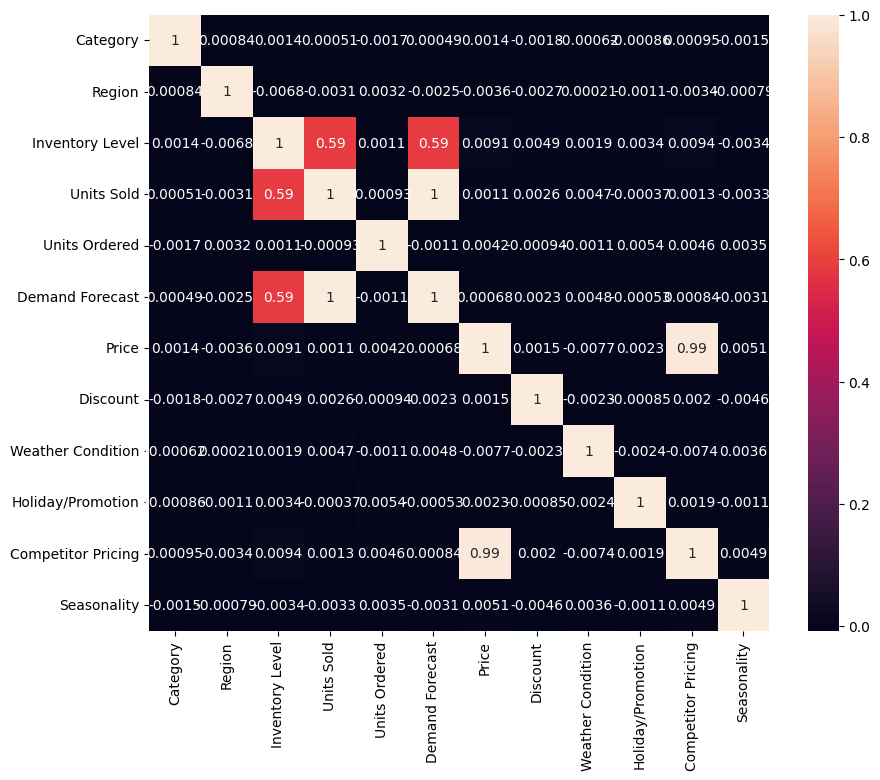

In [56]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

In [57]:
X=data.drop('Demand Forecast',axis=1)
y=data['Demand Forecast']

# Splitting Data

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Linear Regression Model

In [60]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
model.score(X_train,y_train)

0.9937141375448907

In [62]:
model.score(X_test,y_test)

0.9935590605841453

In [63]:
y_pred=model.predict(X_test)

In [64]:
print('r2_score:',r2_score(y_pred,y_test))
print('mean_square_error:',mean_squared_error(y_pred,y_test))
print('mean_absolute_error:',mean_absolute_error(y_pred,y_test))

r2_score: 0.9935288113141945
mean_square_error: 76.77838996844322
mean_absolute_error: 7.5438166159253495
